# Simple Velocity-Heading

In [1]:
import sys
import pathlib
PATH = pathlib.Path("../../src/").resolve()
if str(PATH) not in sys.path:
    sys.path.insert(0, str(PATH))
sys.path

['/home/jhewers/Documents/projects/jdrones/src',
 '/home/jhewers/Documents/projects/jdrones/docs/examples',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/jhewers/.local/lib/python3.10/site-packages',
 '/usr/lib/python3.10/site-packages']

In [2]:
for _ in range(2):
    try:
        import jdrones        
        print(jdrones.__file__, jdrones.__version__)
    except ModuleNotFoundError:
        print("jdrones not found, installing")
        !{sys.executable} -m pip install -q git+ssh://git@github.com/iwishiwasaneagle/jdrones/

/home/jhewers/Documents/projects/jdrones/src/jdrones/__init__.py unknown
/home/jhewers/Documents/projects/jdrones/src/jdrones/__init__.py unknown


In [3]:
import gymnasium
import jdrones
import jdrones.types

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

pybullet build time: Feb  2 2023 13:13:41


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from collections import deque

In [6]:
T = 20
dt = 1/240
seed = 1337

initial_state = jdrones.types.State()
initial_state.pos = (0,0,2)

In [7]:
env = gymnasium.make("VelHeadAltDroneEnv-v0",dt=dt,initial_state=initial_state)
env = gymnasium.wrappers.TimeLimit(env, max_episode_steps=int(T/dt))

In [8]:
observations = deque()

obs, info = env.reset(seed=seed)
setpoint = [-.3,-.1,0,2]
trunc, term = False, False
for i in tqdm(range(int(T/dt)-1)):
    setpoint[2] = 0.4*np.sin(0.4*i*dt)
    
    obs, _, term, trunc, info = env.step(setpoint)
    observations.append(obs)
    
    if term or trunc:
        break

  0%|          | 0/4799 [00:00<?, ?it/s]

/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [9]:
data = np.array(observations)
t = np.linspace(0,len(data)*dt,len(data))
df = pd.DataFrame(data,columns=["x","y","z","qx","qy","qz","qw","phi","theta","psi","vx","vy","vz","p","q","r","P0","P1","P2","P3"],index=t)
df.index.name = 't'
df

,x,y,z,qx,qy,qz,qw,phi,theta,psi,vx,vy,vz,p,q,r,P0,P1,P2,P3
t,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000e+00,0.000000e+00,1.999835,-0.000003,0.000000e+00,0.000017,1.000000,-0.000007,1.205633e-10,0.000035,0.000000e+00,0.000000e+00,-0.039685,-0.001667,0.000000e+00,0.008333,-0.001000,-0.003000,0.000000,2.0
0.004193,2.427764e-24,-1.398393e-19,1.999504,-0.000010,-1.201775e-10,0.000052,1.000000,-0.000021,8.445929e-10,0.000104,5.826634e-22,-3.356142e-17,-0.079362,-0.003333,-5.768519e-08,0.016665,-0.001000,-0.003000,0.000667,2.0
0.008387,-5.980322e-16,3.444666e-11,1.999008,-0.000021,-4.798976e-10,0.000104,1.000000,-0.000042,3.379505e-09,0.000208,-1.435277e-13,8.267199e-09,-0.119032,-0.004999,-1.726657e-07,0.024996,-0.001000,-0.003000,0.001333,2.0
0.012580,-7.769880e-15,1.722211e-10,1.998347,-0.000035,-1.197713e-09,0.000174,1.000000,-0.000069,9.656813e-09,0.000347,-1.721243e-12,3.306588e-08,-0.158695,-0.006665,-3.445514e-07,0.033325,-0.001000,-0.003000,0.002000,2.0
0.016774,-4.122558e-14,5.166260e-10,1.997520,-0.000052,-2.391362e-09,0.000260,1.000000,-0.000104,2.233169e-08,0.000521,-8.029367e-12,8.265716e-08,-0.198349,-0.008330,-5.729521e-07,0.041652,-0.001000,-0.003000,0.002667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.637393,-6.085363e-05,7.482483e-04,0.115404,-0.040059,-5.396193e-05,0.200220,0.978932,-0.078543,1.593641e-02,0.402867,-5.573996e-04,4.579684e-03,-5.710002,-0.249062,-4.762399e-04,1.244500,-0.001044,-0.002991,0.100253,2.0
0.641587,-6.325179e-05,7.676941e-04,0.091474,-0.040570,-5.491567e-05,0.202773,0.978385,-0.079504,1.634649e-02,0.408070,-5.755570e-04,4.666994e-03,-5.743301,-0.250633,-4.816808e-04,1.252342,-0.001045,-0.002991,0.100898,2.0
0.645780,-6.572752e-05,7.875079e-04,0.067405,-0.041084,-5.587915e-05,0.205341,0.977828,-0.080468,1.676417e-02,0.413304,-5.941761e-04,4.755319e-03,-5.776532,-0.252203,-4.871507e-04,1.260178,-0.001046,-0.002991,0.101543,2.0


In [10]:
df_long = df.melt(var_name='variable', value_name='value',ignore_index=False).reset_index()
df_long

,t,variable,value
0,0.000000,x,0.000000e+00
1,0.004193,x,2.427764e-24
2,0.008387,x,-5.980322e-16
3,0.012580,x,-7.769880e-15
4,0.016774,x,-4.122558e-14
...,...,...,...
3135,0.637393,P3,2.000000e+00
3136,0.641587,P3,2.000000e+00
3137,0.645780,P3,2.000000e+00
3138,0.649973,P3,2.000000e+00


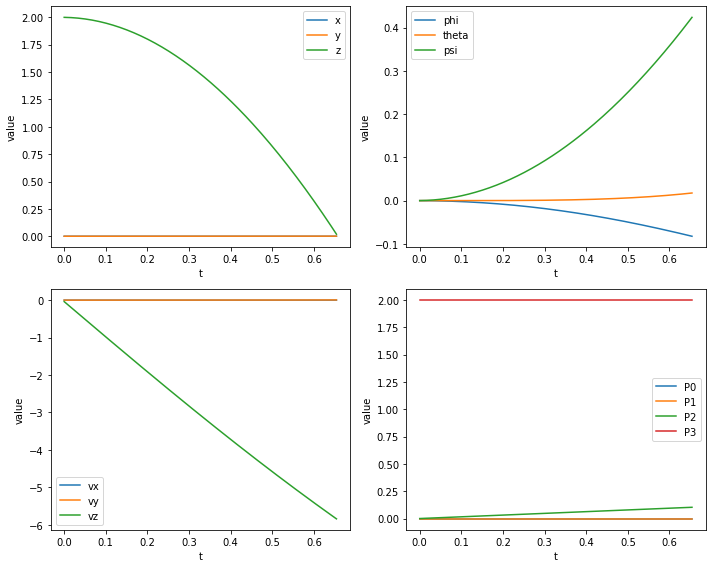

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df_long.query("variable in ('x','y','z')"), x='t',y='value',hue='variable',ax=ax[0])
ax[0].legend()

sns.lineplot(data=df_long.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable',ax=ax[1])
ax[1].legend()

sns.lineplot(data=df_long.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df_long.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable',ax=ax[3])
ax[3].legend()

fig.tight_layout()

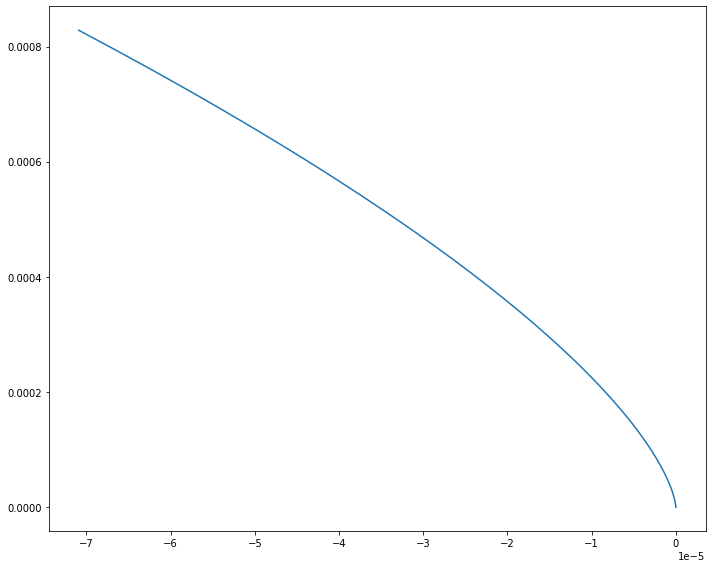

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(df.x, df.y)

fig.tight_layout()